## Pima Indians Diabetes

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from google.colab import files
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546,60,0

In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

### data preprocessing and train test split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1].values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:, -1].values, stratify = df.iloc[:, -1].values, random_state = seed
)

### model defining / setting / learning / evaluating

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Setting
model.compile(
    optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train, validation_split = 0.2,
    epochs = 200, batch_size = 50, verbose = 2
)

Epoch 1/200
10/10 - 1s - loss: 0.6948 - accuracy: 0.4739 - val_loss: 0.6941 - val_accuracy: 0.5776
Epoch 2/200
10/10 - 0s - loss: 0.6867 - accuracy: 0.6630 - val_loss: 0.6903 - val_accuracy: 0.5948
Epoch 3/200
10/10 - 0s - loss: 0.6800 - accuracy: 0.6674 - val_loss: 0.6887 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6762 - accuracy: 0.6674 - val_loss: 0.6877 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6725 - accuracy: 0.6674 - val_loss: 0.6871 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6699 - accuracy: 0.6674 - val_loss: 0.6867 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6671 - accuracy: 0.6674 - val_loss: 0.6865 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6651 - accuracy: 0.6674 - val_loss: 0.6866 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6627 - accuracy: 0.6674 - val_loss: 0.6868 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6606 - accuracy: 0.6674 - val_loss: 0.6869 - val_accuracy: 0.5862
Epoch 11/

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8021


[0.43988940119743347, 0.8020833134651184]

### Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

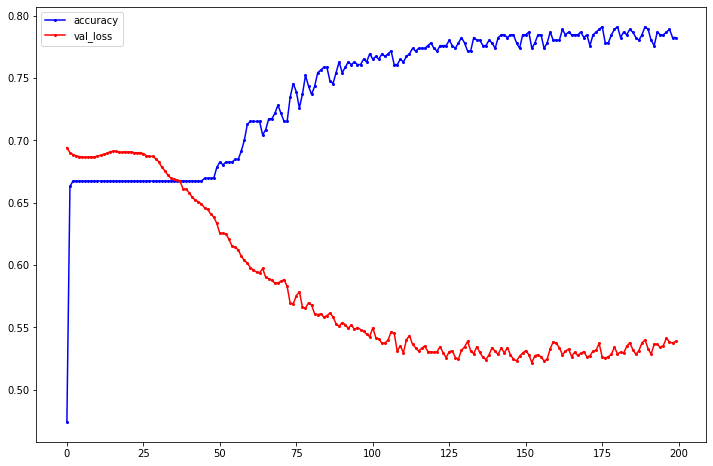

In [ ]:
plt.figure(figsize = x(12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.legend()
plt.show()